In [10]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re


df = pd.read_csv('train.csv')
df = df[pd.notnull(df['category'])]


def preprocess_text(text):
    text = BeautifulSoup(text, 'lxml').get_text()  
    text = re.sub(r'\s+', ' ', text)  
    text = re.sub('[^a-zA-Z]', ' ', text)  
    text = text.lower()  
    return text

df['clean_text'] = df['query_text'].apply(preprocess_text)


X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['category'], test_size=0.2, random_state=42)


model = Pipeline([
    ('vectorizer', CountVectorizer(stop_words=stopwords.words('english'))),
    ('classifier', MultinomialNB())
])


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


[nltk_data] Downloading package stopwords to C:\Users\sanjay k
[nltk_data]     j\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
C:\Users\sanjay k j\AppData\Local\Temp\ipykernel_16316\2709810215.py:23: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()  # Remove HTML tags
C:\Users\sanjay k j\AppData\Local\Temp\ipykernel_16316\2709810215.py:23: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()  # Remove HTML tags


Accuracy: 0.656
Confusion Matrix:
[[114  22   1   3   1]
 [ 53 238   0  32   9]
 [  8  14  42  13  26]
 [  3  51   5 165   5]
 [  6  63  10  19  97]]
Classification Report:
                       precision    recall  f1-score   support

academic_non_servable       0.62      0.81      0.70       141
    academic_servable       0.61      0.72      0.66       332
       conversational       0.72      0.41      0.52       103
              general       0.71      0.72      0.72       229
                 junk       0.70      0.50      0.58       195

             accuracy                           0.66      1000
            macro avg       0.67      0.63      0.64      1000
         weighted avg       0.67      0.66      0.65      1000



In [ ]:
def print_plot(index):
    example = df[df.index == index][['query_text', 'category']].values[0]
    if len(example) > 0:
        print("Query Text:", example[0])
        print('Category:', example[1])


print_plot(101)


print_plot(30)


### EDA for the text and catgory

C:\Users\sanjay k j\AppData\Local\Temp\ipykernel_16316\4145776270.py:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()  # Remove HTML tags
C:\Users\sanjay k j\AppData\Local\Temp\ipykernel_16316\4145776270.py:14: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()  # Remove HTML tags


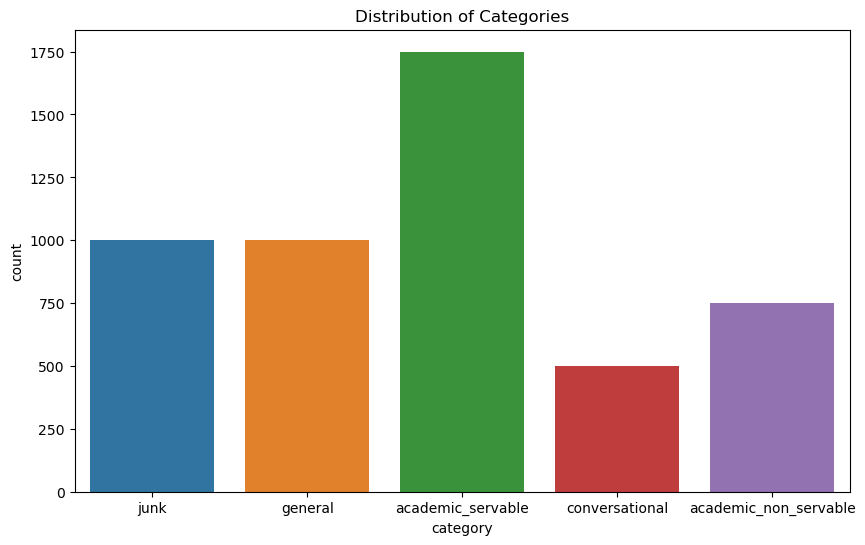

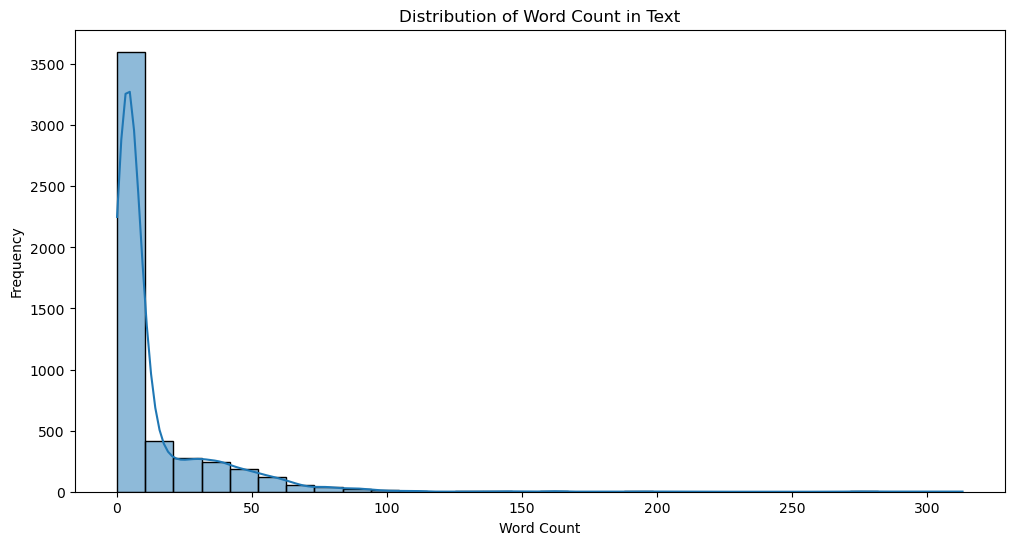

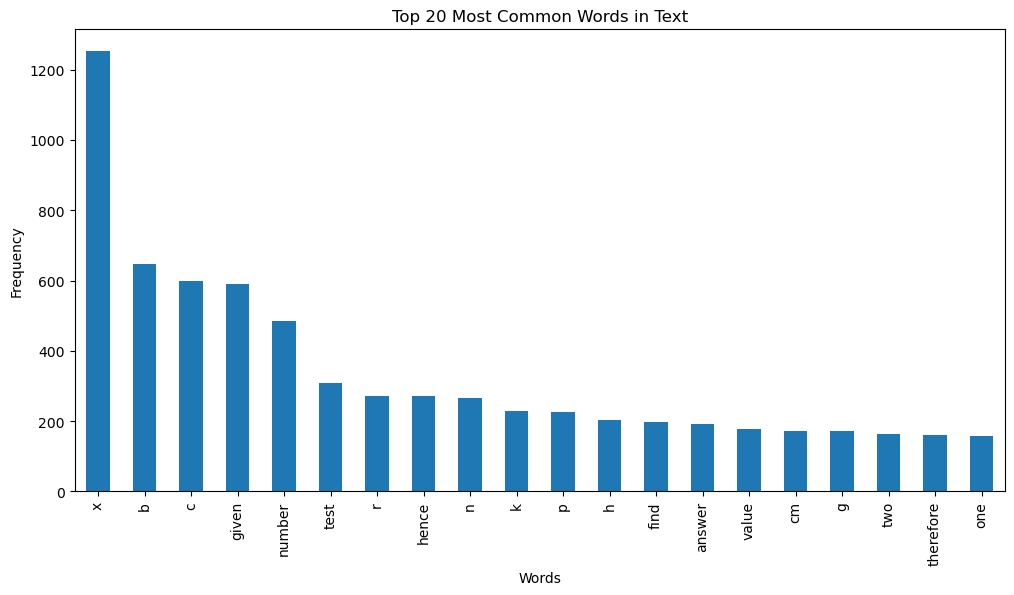

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords


df = pd.read_csv('train.csv')
df = df[pd.notnull(df['category'])]


def preprocess_text(text):
    text = BeautifulSoup(text, 'lxml').get_text()  
    text = re.sub(r'\s+', ' ', text)  
    text = re.sub('[^a-zA-Z]', ' ', text)  
    text = text.lower()
    return text

df['clean_text'] = df['query_text'].apply(preprocess_text)


plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.title('Distribution of Categories')
plt.show()


df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Count in Text')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


stop_words = set(stopwords.words('english'))
corpus = ' '.join(df['clean_text'])
words = [word for word in corpus.split() if word.lower() not in stop_words]
word_freq = pd.Series(words).value_counts().head(20)

plt.figure(figsize=(12, 6))
word_freq.plot(kind='bar')
plt.title('Top 20 Most Common Words in Text')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


### Naive Bayes classifier for multinomial models

In [15]:

import logging
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re


df = pd.read_csv('train.csv')
df = df[pd.notnull(df['category'])]


def preprocess_text(text):
    text = BeautifulSoup(text, 'lxml').get_text() 
    text = re.sub(r'\s+', ' ', text)  
    text = re.sub('[^a-zA-Z]', ' ', text)  
    text = text.lower()  
    return text

df['clean_text'] = df['query_text'].apply(preprocess_text)


df['is_academic'] = df['category'].apply(lambda x: 1 if x == 'academic_servable' or x == 'academic_non_servable' else 0)


X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['is_academic'], test_size=0.2, random_state=42)


model = Pipeline([
    ('vectorizer', CountVectorizer(stop_words=stopwords.words('english'))),
    ('classifier', MultinomialNB())
])


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')



C:\Users\sanjay k j\AppData\Local\Temp\ipykernel_16316\1588983804.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()  # Remove HTML tags
C:\Users\sanjay k j\AppData\Local\Temp\ipykernel_16316\1588983804.py:19: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()  # Remove HTML tags


Accuracy: 0.811
Confusion Matrix:
[[410 117]
 [ 72 401]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       527
           1       0.77      0.85      0.81       473

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



## Confuseion matrix 

### Linear Vector support machine

In [15]:

import logging
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC 
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re

df = pd.read_csv('train.csv')
df = df[pd.notnull(df['category'])]


def preprocess_text(text):
    text = BeautifulSoup(text, 'lxml').get_text()  
    text = re.sub(r'\s+', ' ', text)  
    text = re.sub('[^a-zA-Z]', ' ', text)  
    text = text.lower()
    return text

df['clean_text'] = df['query_text'].apply(preprocess_text)


df['is_academic'] = df['category'].apply(lambda x: 1 if x == 'academic_servable' or x == 'academic_non_servable' else 0)


X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['is_academic'], test_size=0.2, random_state=42)


model = Pipeline([
    ('vectorizer', CountVectorizer(stop_words=stopwords.words('english'))),
    ('classifier', LinearSVC())  
])


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


C:\Users\sanjay k j\AppData\Local\Temp\ipykernel_18924\3482095203.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()  # Remove HTML tags
C:\Users\sanjay k j\AppData\Local\Temp\ipykernel_18924\3482095203.py:19: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()  # Remove HTML tags


Accuracy: 0.839
Confusion Matrix:
[[479  48]
 [113 360]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       527
           1       0.88      0.76      0.82       473

    accuracy                           0.84      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



C:\Users\sanjay k j\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


### Logistic Regression

In [18]:

import logging
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re

# Loding the dataset 
df = pd.read_csv('train.csv')
df = df[pd.notnull(df['category'])]


def preprocess_text(text):
    text = BeautifulSoup(text, 'lxml').get_text() 
    text = re.sub(r'\s+', ' ', text) 
    text = re.sub('[^a-zA-Z]', ' ', text) 
    text = text.lower()  
    return text

df['clean_text'] = df['query_text'].apply(preprocess_text)


df['is_academic'] = df['category'].apply(lambda x: 1 if x == 'academic_servable' or x == 'academic_non_servable' else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['is_academic'], test_size=0.2, random_state=42)

# A pipeline with CountVectorizer and Logistic Regression classifier
model = Pipeline([
    ('vectorizer', CountVectorizer(stop_words=stopwords.words('english'))),
    ('classifier', LogisticRegression())  # LogisticRegression
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')



C:\Users\sanjay k j\AppData\Local\Temp\ipykernel_16316\2141237656.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()  # Remove HTML tags
C:\Users\sanjay k j\AppData\Local\Temp\ipykernel_16316\2141237656.py:19: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()  # Remove HTML tags


Accuracy: 0.841
Confusion Matrix:
[[494  33]
 [126 347]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       527
           1       0.91      0.73      0.81       473

    accuracy                           0.84      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.85      0.84      0.84      1000



In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-an

ERROR: Exception:
Traceback (most recent call last):
  File "D:\work\anaconda_install\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "D:\work\anaconda_install\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "D:\work\anaconda_install\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "D:\work\anaconda_install\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "D:\work\anaconda_install\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "D:\work\anaconda_install\Lib\socket.py", line 706, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^

### Doc2vec and Logistic Regression

In [16]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import FunctionTransformer

# Loading the  dataset
df = pd.read_csv('train.csv')

# Assuming your text data is in a 'query_text' column
X_train, X_test, y_train, y_test = train_test_split(df['query_text'], df['category'], test_size=0.2, random_state=42)


train_tagged = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(X_train)]
test_tagged = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(X_test)]


doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
doc2vec_model.build_vocab(train_tagged)
doc2vec_model.train(train_tagged, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)


def get_vector(text_series):
    vectors = text_series.apply(lambda text: doc2vec_model.infer_vector(text.split()))
    return pd.DataFrame(vectors.tolist(), columns=[f'vec_{i}' for i in range(len(vectors.iloc[0]))])


model = Pipeline([
    ('vectorizer', FunctionTransformer(get_vector, validate=False)),
    ('classifier', LogisticRegression())
])

# Train the model
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)



Accuracy: 0.508
Classification Report:
                        precision    recall  f1-score   support

academic_non_servable       0.96      0.47      0.63       141
    academic_servable       0.45      0.87      0.60       332
       conversational       0.47      0.33      0.39       103
              general       0.59      0.49      0.54       229
                 junk       0.19      0.03      0.05       195

             accuracy                           0.51      1000
            macro avg       0.53      0.44      0.44      1000
         weighted avg       0.51      0.51      0.46      1000

